# ITS_LIVE: calculate Metric 2

This notebook calculates $\delta_{x'y'}$ for all ITS_LIVE velocity maps.

To reproduce this workflow, make sure you have downloaded all necessary input files (velocity maps and static terrain geometries) from https://doi.org/10.17605/OSF.IO/HE7YR and have updated the `Vx` and `Vy` columns in `notebooks/results_ITSLIVE.csv` or `notebooks/manifest_ITSLIVE.csv` with the downloaded file paths before starting the analysis.

In [1]:
import glaft
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# df = pd.read_csv('../manifest.csv', dtype=str)
df = pd.read_csv('../results_ITSLIVE.csv', dtype=str)
# df

In [4]:
# flow area
in_shp = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s_inwardBuffer600m_EPSG3413.shp'

Here's a demo for calculating Metric 2 for an ITS_LIVE velocity map:

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running cal_outlier_percent


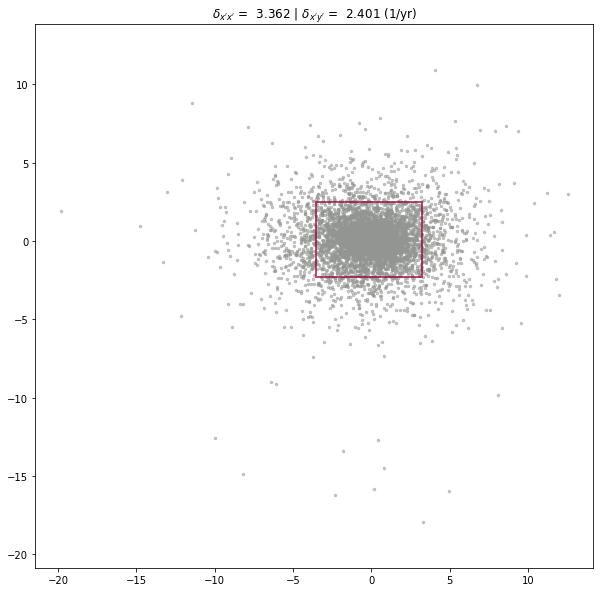

In [5]:
exp = glaft.Velocity(vxfile=df.loc[4, 'Vx'], vyfile=df.loc[4, 'Vy'], 
                     on_ice_area=in_shp, kde_gridsize=60, thres_sigma=2.0, 
                     velocity_unit='m/yr')
exp.longitudinal_shear_analysis(plot='full')

Now let's batch process all the maps:

Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running cal_outlier_percent
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Running calculate_kde
Running construct_crude_mesh
Running eval_crude_mesh
Running construct_fine_mesh
Running eval_fine_mesh
Running thresholding_fine_mesh
Running thresholding_metric
Running cal_outlier_percent
Running clip_on_ice_area
Running get_grid_spacing
Running calculate_flow_theta
Running calculate_strain_rate
Running prep_strain_rate_kde
Running calculate_xystd
Running calculate_bandwidth
Runn

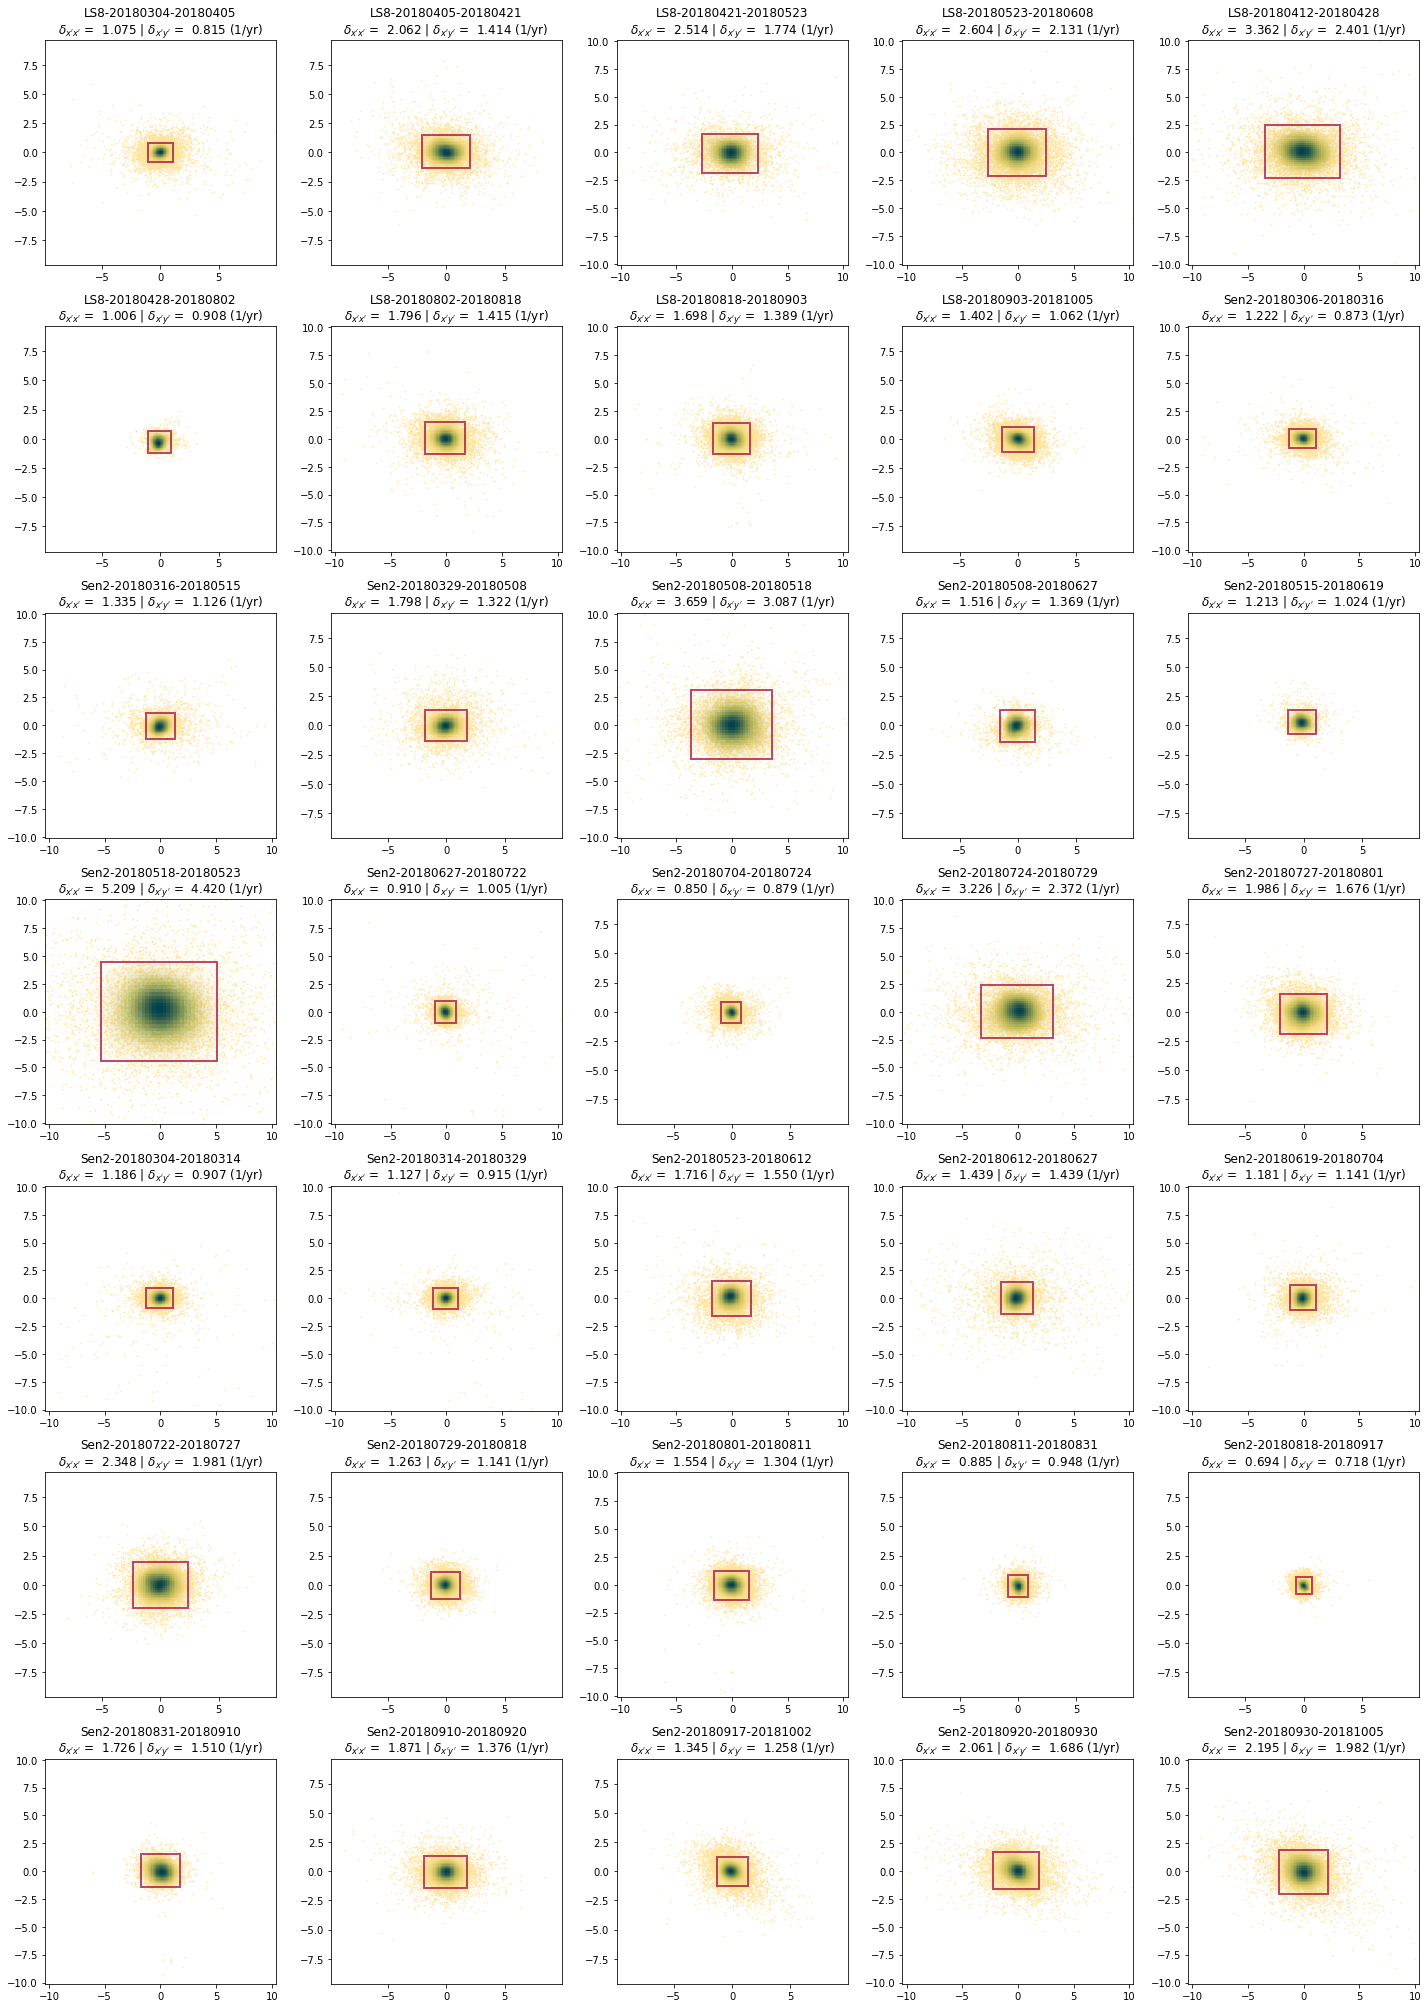

In [6]:
fig, ax2 = plt.subplots(7, 5, figsize=(20, 28))
n = 0 

for idx, row in df.iterrows():
    label = row.Label
    ax_sel = ax2[n // 5, n % 5]
    ax_sel.axis('equal')
    exp = glaft.Velocity(vxfile=row.Vx, vyfile=row.Vy, on_ice_area=in_shp, kde_gridsize=60, thres_sigma=2.0, velocity_unit='m/yr')
    exp.longitudinal_shear_analysis(plot='zoomed', ax=ax_sel)
    ax_sel.set_xlim(-10, 10)
    ax_sel.set_ylim(-10, 10)
    titletext = ax_sel.get_title()
    titletext = label + '\n' + titletext
    ax_sel.set_title(titletext)
    
    df.loc[idx, 'LSR-uncertainty-nm'] = exp.metric_alongflow_normal
    df.loc[idx, 'LSR-uncertainty-sh'] = exp.metric_alongflow_shear
    
    
    n += 1
    
plt.tight_layout()
fig.patch.set_facecolor('xkcd:white')
fig.savefig('figs/ITSLVE-LSR.png')

![](figs/ITSLVE-LSR.png)

In [8]:
df.to_csv('../results_ITSLIVE.csv', index=False)
# df